<a href="https://colab.research.google.com/github/MrIsdi/YOLOV8/blob/main/Yolov8_image_video.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 612.6/612.6 kB 39.9 MB/s eta 0:00:00


Untuk Seed Tomato

In [ ]:
from ultralytics import YOLO
import requests
import os
model = YOLO("/content/drive/MyDrive/yolov8-seedTomato/runs/detect/train/weights/best.pt")

In [ ]:
data = os.listdir("/content/drive/MyDrive/TA/Foto/Sistem")
tumbuh, belumTumbuh = 0, 0
for i in data:
  results = model.predict(source=f"/content/drive/MyDrive/TA/Foto/Sistem/{i}", imgsz=640, conf=0.5)
  for result in results:
    boxes = result.boxes
  for i in boxes.cls:
    if i == 1:
      tumbuh += 1
    else:
      belumTumbuh += 1
  requests.post("https://learnmri.000webhostapp.com/yolov1",{
      "tumbuh": tumbuh,
      "belumTumbuh": belumTumbuh
  })
  tumbuh, belumTumbuh = 0, 0


image 1/1 /content/drive/MyDrive/TA/Foto/Sistem/Day2s.jpg: 640x480 10 Belums, 20 Tumbuhs, 12.2ms
Speed: 4.1ms preprocess, 12.2ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 /content/drive/MyDrive/TA/Foto/Sistem/Day1.jpg: 640x480 14 Belums, 16 Tumbuhs, 12.1ms
Speed: 3.2ms preprocess, 12.1ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 /content/drive/MyDrive/TA/Foto/Sistem/Day7s.jpg: 640x640 2 Belums, 29 Tumbuhs, 18.7ms
Speed: 3.6ms preprocess, 18.7ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/TA/Foto/Sistem/Day6s.jpg: 640x480 2 Belums, 32 Tumbuhs, 12.9ms
Speed: 3.0ms preprocess, 12.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 /content/drive/MyDrive/TA/Foto/Sistem/Day5s.jpg: 640x480 10 Belums, 22 Tumbuhs, 12.1ms
Speed: 3.2ms preprocess, 12.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 /content/drive/My

In [ ]:
import shutil
target = r"/content/drive/MyDrive/TA"
original = r"/content/hasil"
shutil.move(original, target)

'/content/drive/MyDrive/TA/hasil'

Untuk Mask Detection

In [ ]:
from ultralytics import YOLO
model = YOLO("/content/drive/MyDrive/yolov8-mask/detect/train/weights/best.pt")
results = model.predict(source="/content/WIN_20230623_21_55_51_Pro.jpg", imgsz=640, conf=0.5, save=True, boxes=True)


image 1/1 /content/WIN_20230623_21_55_51_Pro.jpg: 384x640 1 Bermasker, 61.4ms
Speed: 4.5ms preprocess, 61.4ms inference, 34.8ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict


In [ ]:
results = model("/content/asian_mask76.jpg")


image 1/1 /content/asian_mask76.jpg: 640x640 2 Bermaskers, 21.0ms
Speed: 4.0ms preprocess, 21.0ms inference, 7.3ms postprocess per image at shape (1, 3, 640, 640)


In [ ]:
boxes = results[0].boxes
boxes[1].xyxy[0]  # box with xyxy format, (N, 4)

tensor([123.63035, 103.21853, 222.50662, 212.72105], device='cuda:0')

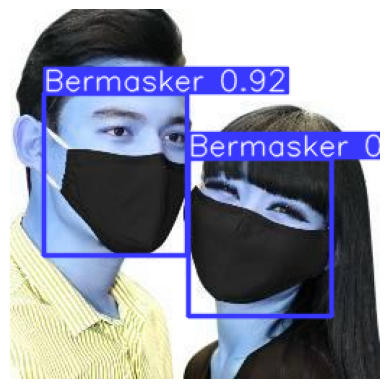

In [ ]:
import cv2
import matplotlib.pyplot as plt
plt.axis("off")
plt.imshow(results[0].plot())
plt.show()

In [ ]:
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from google.colab.patches import cv2_imshow
from base64 import b64decode, b64encode
import cv2
import numpy as np
import PIL
import io
import html
import time
import matplotlib.pyplot as plt
from ultralytics import YOLO
%matplotlib inline

In [ ]:
# function to convert the JavaScript object into an OpenCV image
model = YOLO("/content/drive/MyDrive/yolov8-mask/detect/train/weights/best.pt")
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv2.imdecode(jpg_as_np, flags=1)

  return img

# function to convert OpenCV Rectangle bounding box image into base64 byte string to be overlayed on video stream
def bbox_to_bytes(bbox_array):
  """
  Params:
          bbox_array: Numpy array (pixels) containing rectangle to overlay on video stream.
  Returns:
        bytes: Base64 image byte string
  """
  # convert array into PIL image
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  # format bbox into png for return
  bbox_PIL.save(iobuf, format='png')
  # format return string
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes

In [ ]:
# JavaScript to properly create our live video stream using our webcam as input
def video_stream():
  js = Javascript('''
    var video;
    var div = null;
    var stream;
    var captureCanvas;
    var imgElement;
    var labelElement;

    var pendingResolve = null;
    var shutdown = false;

    function removeDom() {
       stream.getVideoTracks()[0].stop();
       video.remove();
       div.remove();
       video = null;
       div = null;
       stream = null;
       imgElement = null;
       captureCanvas = null;
       labelElement = null;
    }

    function onAnimationFrame() {
      if (!shutdown) {
        window.requestAnimationFrame(onAnimationFrame);
      }
      if (pendingResolve) {
        var result = "";
        if (!shutdown) {
          captureCanvas.getContext('2d').drawImage(video, 0, 0, 640, 480);
          result = captureCanvas.toDataURL('image/jpeg', 0.8)
        }
        var lp = pendingResolve;
        pendingResolve = null;
        lp(result);
      }
    }

    async function createDom() {
      if (div !== null) {
        return stream;
      }

      div = document.createElement('div');
      div.style.border = '2px solid black';
      div.style.padding = '3px';
      div.style.width = '100%';
      div.style.maxWidth = '600px';
      div.style.height = "50vh";
      div.style.position = "fixed";
      div.style.top = "0"
      div.style.bottom = "0"
      let = outputArea = document.getElementById("output-area");
      outputArea.style.minHeight = "50vh";
      outputArea.style.height = "100%";
      document.body.appendChild(div);


      const modelOut = document.createElement('div');
      modelOut.innerHTML = "Status:";
      labelElement = document.createElement('span');
      labelElement.innerText = 'No data';
      labelElement.style.fontWeight = 'bold';
      modelOut.appendChild(labelElement);
      div.appendChild(modelOut);

      video = document.createElement('video');
      video.style.display = 'block';
      video.width = div.clientWidth - 6;
      video.setAttribute('playsinline', '');
      video.onclick = () => { shutdown = true; };
      stream = await navigator.mediaDevices.getUserMedia(
          {video: { facingMode: "environment"}});
      div.appendChild(video);

      imgElement = document.createElement('img');
      imgElement.style.position = 'absolute';
      imgElement.style.zIndex = 1;
      imgElement.onclick = () => { shutdown = true; };
      div.appendChild(imgElement);

      const instruction = document.createElement('div');
      instruction.innerHTML =
          '' +
          'When finished, click here or on the video to stop this demo';
      div.appendChild(instruction);
      instruction.onclick = () => { shutdown = true; };

      video.srcObject = stream;
      await video.play();

      captureCanvas = document.createElement('canvas');
      captureCanvas.width = 640; //video.videoWidth;
      captureCanvas.height = 480; //video.videoHeight;
      window.requestAnimationFrame(onAnimationFrame);

      return stream;
    }
    async function stream_frame(label, imgData) {
      if (shutdown) {
        removeDom();
        shutdown = false;
        return '';
      }

      var preCreate = Date.now();
      stream = await createDom();

      var preShow = Date.now();
      if (label != "") {
        labelElement.innerHTML = label;
      }

      if (imgData != "") {
        var videoRect = video.getClientRects()[0];
        imgElement.style.top = videoRect.top + "px";
        imgElement.style.left = videoRect.left + "px";
        imgElement.style.width = videoRect.width + "px";
        imgElement.style.height = videoRect.height + "px";
        imgElement.src = imgData;
      }

      var preCapture = Date.now();
      var result = await new Promise(function(resolve, reject) {
        pendingResolve = resolve;
      });
      shutdown = false;

      return {'create': preShow - preCreate,
              'show': preCapture - preShow,
              'capture': Date.now() - preCapture,
              'img': result};
    }
    ''')

  display(js)

def video_frame(label, bbox):
  data = eval_js('stream_frame("{}", "{}")'.format(label, bbox))
  return data

In [ ]:
#@title Default title text
# start streaming video from webcam
video_stream()
# label for video
label_html = 'Capturing...'
# initialze bounding box to empty
bbox = ''
count = 0
while True:
    js_reply = video_frame(label_html, bbox)
    if not js_reply:
        break

    # convert JS response to OpenCV Image
    frame = js_to_image(js_reply["img"])

    # create transparent overlay for bounding box
    bbox_array = np.zeros([480,640,4], dtype=np.uint8)

    # call our darknet helper on video frame
    results = model(frame)
    detections = results[0].boxes
    for i in range(len(detections)):
      label = "Bermasker" if detections[i].cls == 0 else "Tidak"
      confidence = detections[i].conf
      xmin, ymin, xmax, ymax = detections[i].xyxy[0]
      cv2.rectangle(bbox_array, (int(xmin), int(ymin)), (int(xmax),int(ymax)), (0, 255, 0), 2)
      cv2.putText(bbox_array, f'{label}: {float(confidence):.2f}', (int(xmin), int(ymin) - 10),
                   cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)


    bbox_array[:,:,3] = (bbox_array.max(axis = 2) > 0 ).astype(int) * 255
    # convert overlay of bbox into bytes
    bbox_bytes = bbox_to_bytes(bbox_array)
    # update bbox so next frame gets new overlay
    bbox = bbox_bytes

<IPython.core.display.Javascript object>


0: 480x640 2 Tidak_Bermaskers, 13.2ms
Speed: 2.9ms preprocess, 13.2ms inference, 2.3ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 Tidak_Bermasker, 13.1ms
Speed: 2.4ms preprocess, 13.1ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 Tidak_Bermasker, 13.1ms
Speed: 2.3ms preprocess, 13.1ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 Tidak_Bermasker, 13.1ms
Speed: 2.5ms preprocess, 13.1ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 Tidak_Bermasker, 13.6ms
Speed: 2.8ms preprocess, 13.6ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 Tidak_Bermasker, 13.2ms
Speed: 2.3ms preprocess, 13.2ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 Tidak_Bermasker, 13.1ms
Speed: 2.3ms preprocess, 13.1ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 Tidak_Bermasker, 15.2ms
Speed: 1.7ms pre